# Benchmarks game

This notebook contains the baseline measurements using benchmarks game.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Read both multi-threaded and single-threaded results.
mt_csv = "measurements_17_4_14.csv"
st_csv = "measurements_17_4_19_st.csv"
raw_mt = pd.read_csv(mt_csv)
raw_st = pd.read_csv(st_csv)

In [7]:
# Create a common dataframe
raw_mt["type"] = "mt"
raw_st["type"] = "st"
raw = raw_mt.append( raw_st, ignore_index=True )

In [8]:
raw

,name,lang,id,n,size(B),cpu(s),mem(KB),status,load,elapsed(s),type
0,binarytrees,pycket,1,20,621,0.000,0,-10,%,35.824,mt
1,binarytrees,pycket,2,20,759,55.979,0,0,%,57.484,mt
2,binarytrees,racket,2,20,759,28.999,0,0,%,29.054,mt
3,binarytrees,racket,1,20,621,0.000,0,-10,%,17.012,mt
4,chameneosredux,racket,2,6000000,987,120.408,0,0,%,120.531,mt
5,chameneosredux,racket,1,6000000,952,0.000,0,-10,%,196.846,mt
6,chameneosredux,pycket,2,6000000,987,0.000,0,-2,%,2.760,mt
7,chameneosredux,pycket,1,6000000,952,0.000,0,-2,%,10.428,mt
8,fannkuchredux,pycket,1,12,861,143.510,0,0,%,144.186,mt
9,fannkuchredux,racket,2,12,1141,261.199,0,0,%,260.768,mt


## Filter out illegal runs

Certain Pycket runs fail due to unimplemented libraries. Mostly due to threading-related libraries not being supported on Pycket. The remaining Pycket implementations should be good enough.

In [10]:
# Tuples of (benchmark, lang, id)
illegal_runs = [ ("chameneosredux", "pycket", 1),
                 ("chameneosredux", "pycket", 2),
                 ("fannkuchredux",  "pycket", 3),
                 ("knucleotide",    "pycket", 1),
                 ("knucleotide",    "pycket", 4),             
                 ("mandelbrot",     "pycket", 4),
                 ("pidigits",       "pycket", 2),
                 ("regexdna",       "pycket", 1),
                 ("spectralnorm",   "pycket", 3),
                 ("threadring",     "pycket", 1),                          
               ]

In [11]:
# Remove illegal runs. Note row.name has a special meaning, so using row["name"].
# apply() applies function over on all rows (axis=1), and [] operator accepts a bool
# series to select only those entries which are true.
df = raw[ raw.apply( lambda r: (r["name"], r.lang, r.id) not in illegal_runs, axis=1 ) ]

# If there are multiple data points, we sort them initially by ascending execution time,
# then groupby the identifying fields (name, lang, id) without the index, then pick the first
# one.
df = df.sort_values(by="elapsed(s)").groupby(["name", "lang", "id", "type"], as_index=False).first()

In [12]:
df

,name,lang,id,type,n,size(B),cpu(s),mem(KB),status,load,elapsed(s)
0,binarytrees,gcc,1,mt,20,842,13.344,0,0,%,13.361
1,binarytrees,gcc,1,st,20,842,13.338,0,0,%,13.408
2,binarytrees,gcc,3,mt,20,1826,3.337,0,0,%,0.688
3,binarytrees,gcc,3,st,20,1826,2.961,0,0,%,3.006
4,binarytrees,gcc,5,mt,20,1044,21.069,0,0,%,3.721
5,binarytrees,gcc,5,st,20,1044,19.081,0,0,%,19.203
6,binarytrees,gpp,1,mt,20,886,17.433,0,0,%,1.394
7,binarytrees,gpp,1,st,20,886,4.157,0,0,%,4.211
8,binarytrees,gpp,2,mt,20,612,14.574,0,0,%,14.593
9,binarytrees,gpp,2,st,20,612,14.459,0,0,%,14.548


## Find fastest implementations

We find the fastest implementations of each benchmark, multi-threaded (`mt`) and single-threaded (`st`) measurements shown separately. The best performing languages below are unsurprisingly gpp or gcc for most of the benchmarks, but `pidigits` and `threadring` surprisingly perform better on CPython and PyPy respectively. The runner script checks the output for correctness, but this is a TODO item for me to manually verify if the benchmarks are really doing the same amount of work.

In [13]:
fast = df.sort_values(by="elapsed(s)").groupby(["type", "name"]).first()

In [14]:
fast

lang  id         n  size(B)  cpu(s)  mem(KB)  status  \
type name                                                                     
mt   binarytrees        gcc   3        20     1826   3.337        0       0   
     chameneosredux     gpp   5   6000000     2549   0.000        0     -10   
     fannkuchredux      gcc   5        12     2262  43.613        0       0   
     fasta              gcc   5  25000000     2444   2.807        0       0   
     knucleotide        gpp   3  25000000     1373  22.949        0       0   
     mandelbrot         gcc   5     16000     1134  12.114        0       0   
     meteor             gpp   6      2098     2850   0.047        0       0   
     nbody              gcc   4  50000000     1702   7.566        0       0   
     pidigits        python  24     10000      378   0.038        0       0   
     regexdna           gcc   4   5000000     1833  22.136        0       0   
     revcomp            gcc   6  25000000     1794   0.777        0       0   
     spectralnorm       gcc   5      5500      729  10.543        0       0   
     threadring        pypy  21  50000000      407   3.038        0       0   
st   binarytrees        gcc   3        20     1826   2.961        0       0   
     chameneosredux     gpp   2   6000000     2357   0.000        0     -10   
     fannkuchredux      gpp   7        12     1898  19.109        0       0   
     fasta              gcc   6  25000000     4337   3.382        0       0   
     knucleotide        gpp   3  25000000     1373  15.870        0       0   
     mandelbrot         gcc   5     16000     1134   6.625        0       0   
     meteor             gpp   6      2098     2850   0.047        0       0   
     nbody              gcc   4  50000000     1702   7.587        0       0   
     pidigits        python  24     10000      378   0.038        0       0   
     regexdna           gpp   1   5000000      738   4.869        0       0   
     revcomp            gcc   1  25000000     1949   0.622        0       0   
     spectralnorm    python  22      5500      394   2.213        0       0   
     threadring        pypy  21  50000000      407   3.031        0       0   

                    load  elapsed(s)  
type name                             
mt   binarytrees       %       0.688  
     chameneosredux    %       1.393  
     fannkuchredux     %       4.441  
     fasta             %       7.832  
     knucleotide       %       2.475  
     mandelbrot        %       1.197  
     meteor            %       0.056  
     nbody             %       7.577  
     pidigits          %       0.092  
     regexdna          %       3.480  
     revcomp           %       7.188  
     spectralnorm      %       0.672  
     threadring        %       3.099  
st   binarytrees       %       3.006  
     chameneosredux    %       1.079  
     fannkuchredux     %      19.226  
     fasta             %      11.520  
     knucleotide       %      15.974  
     mandelbrot        %       7.407  
     meteor            %       0.063  
     nbody             %       7.648  
     pidigits          %       0.115  
     regexdna          %       4.938  
     revcomp           %       2.764  
     spectralnorm      %       2.549  
     threadring        %       3.078

## Multi-threaded implementation performance

We show the performance of all implementations and languages normalized to the fastest in each benchmark.

In [20]:
# List of benchmarks
bmarks = fast.index.levels[1]

In [39]:
# Create a new field "impl" with name-lang-id tuple.
df = df.assign( impl=df.apply( lambda r: "{}-{}-{}-{}".format( r["name"], r.lang, r.id, r.type ), axis=1 ) )

# Create a new field "normalized_exec_time" that is the exec time / fastest exec time for benchmark.
df = df.assign( normalized_exec_time=df.apply( lambda r: r["elapsed(s)"] 
                                              / fast.loc[r.type].loc[r["name"]]["elapsed(s)"], axis=1 ) ) 

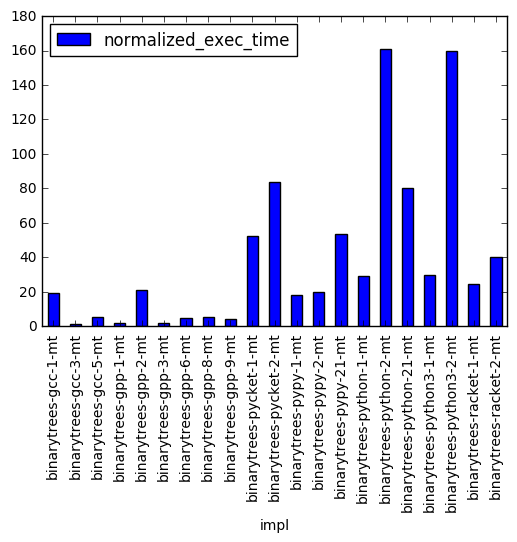

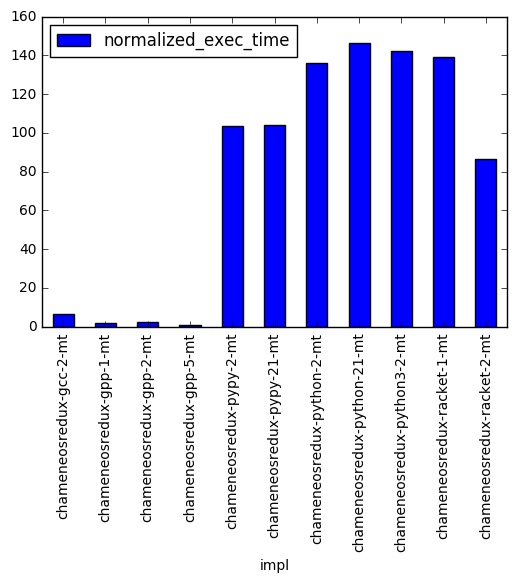

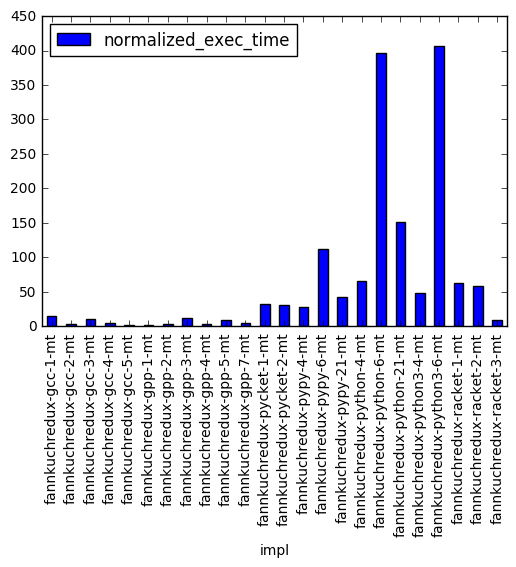

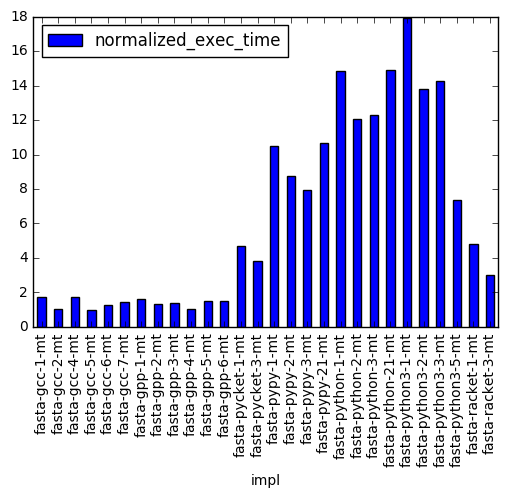

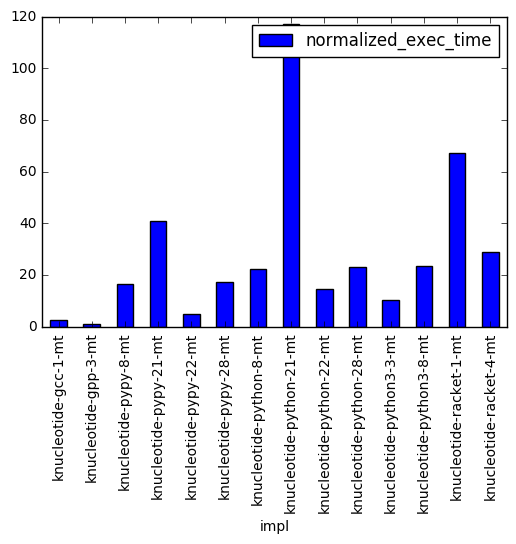

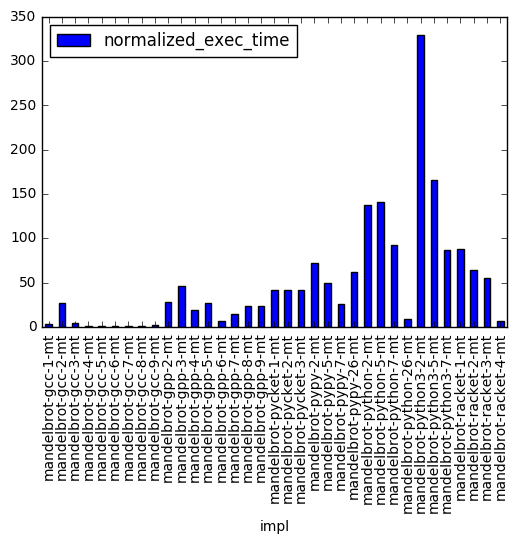

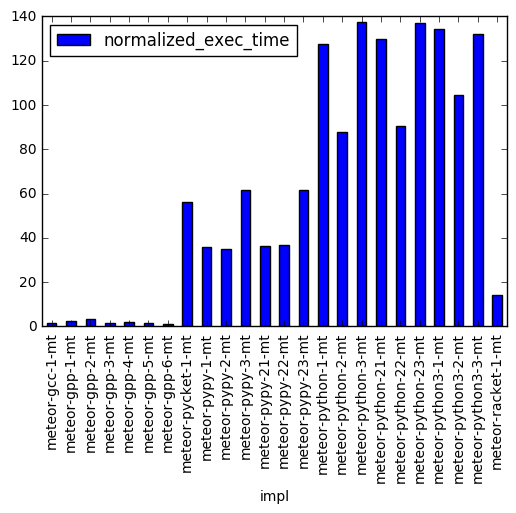

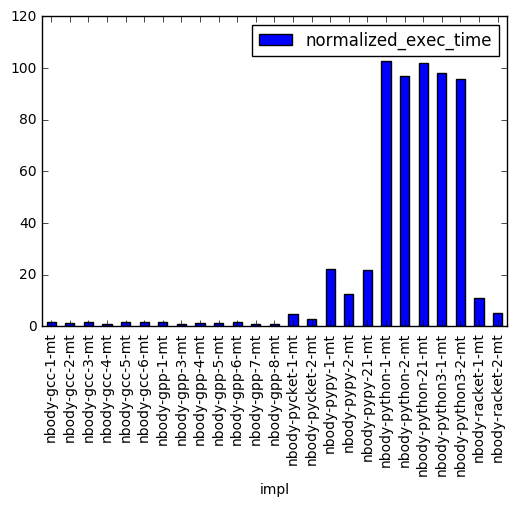

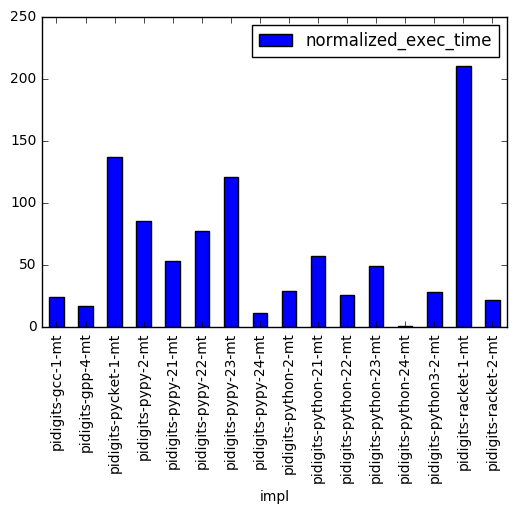

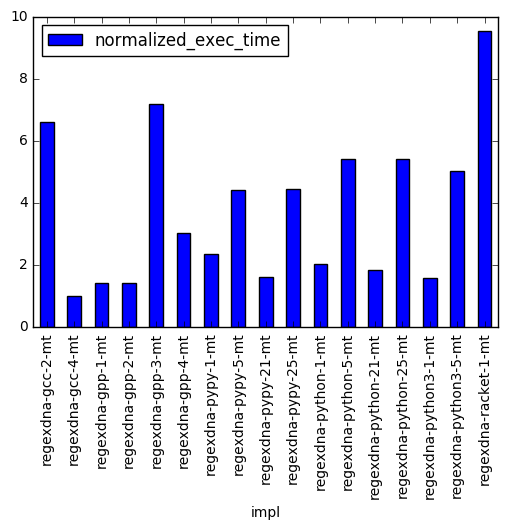

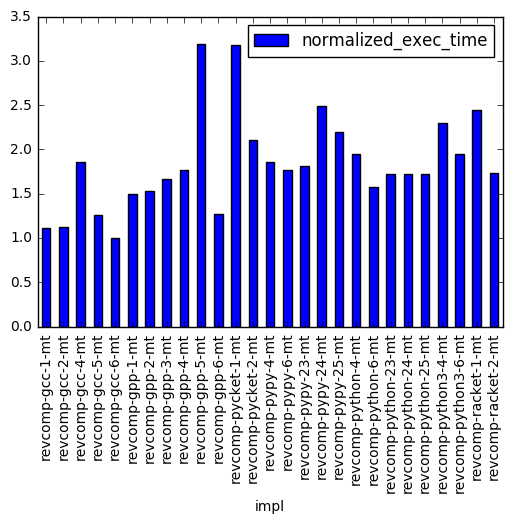

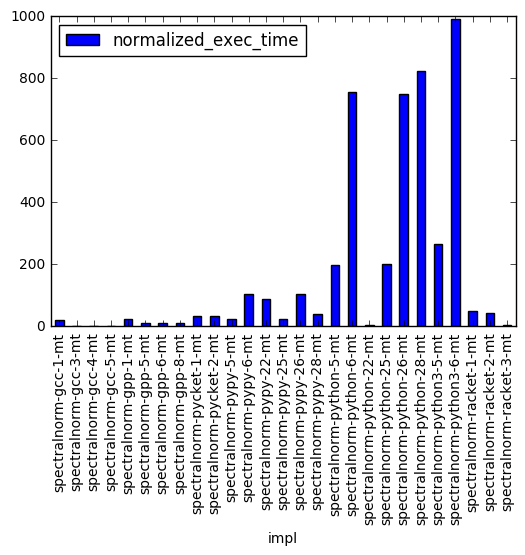

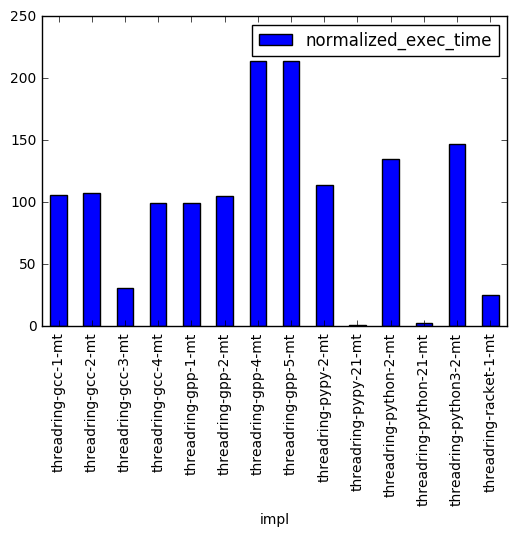

In [41]:
for bmark in bmarks:
    df[(df["name"] == bmark) & (df.type == "mt")].plot( kind="bar", x="impl", y="normalized_exec_time" )

## Single-threaded implementation performance

Same thing as above, but for single-threaded.

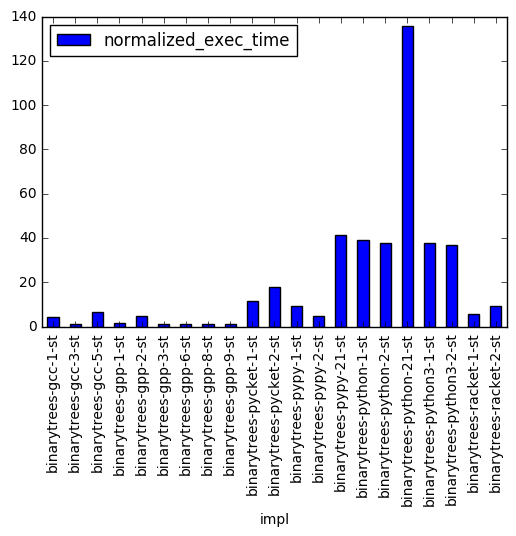

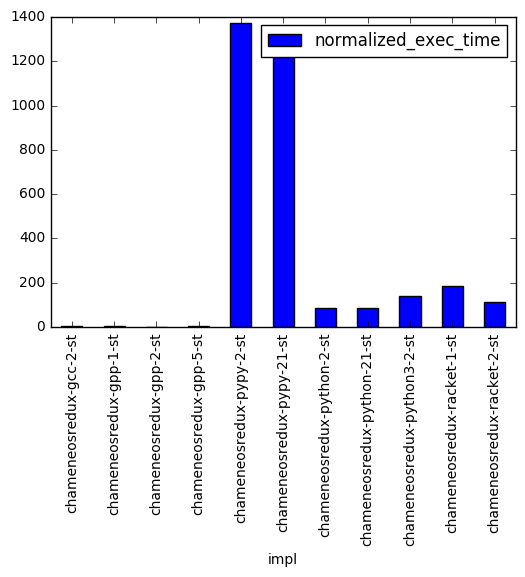

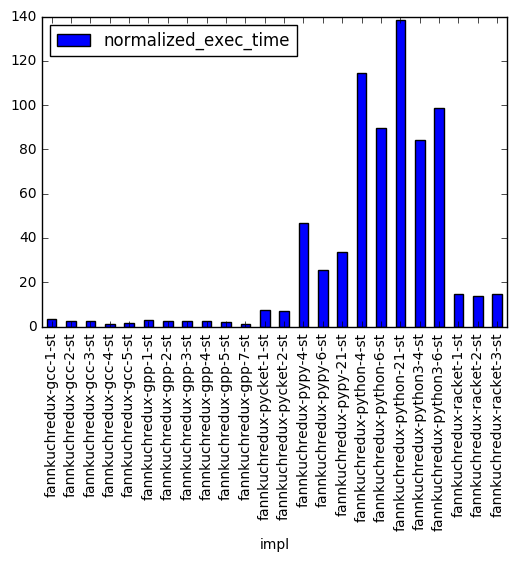

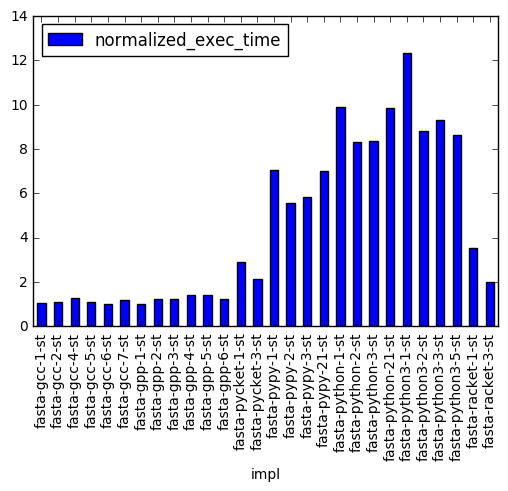

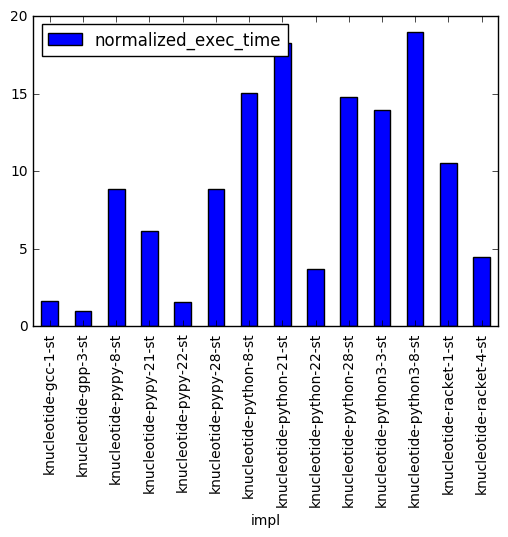

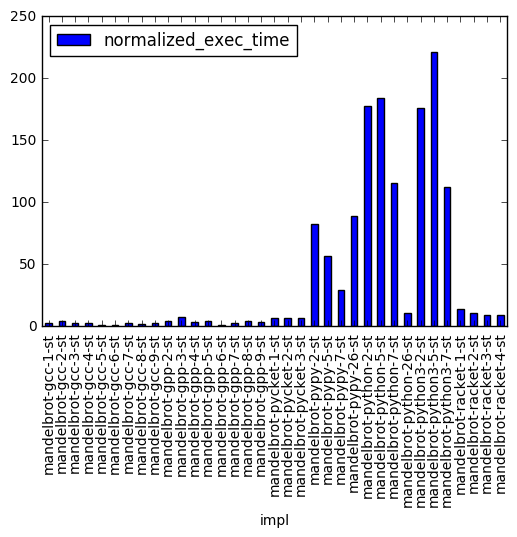

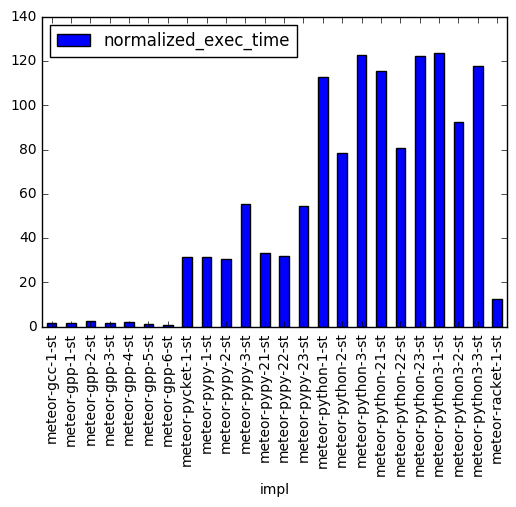

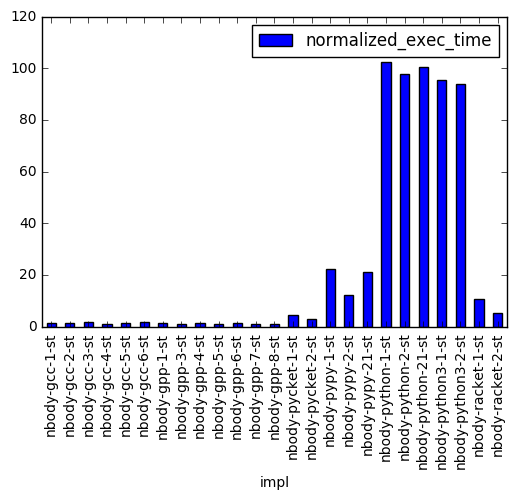

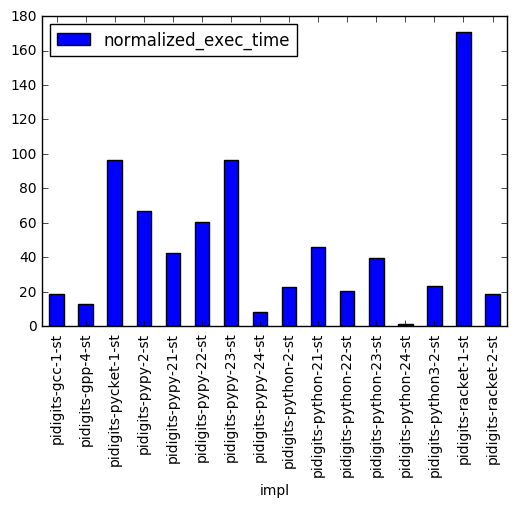

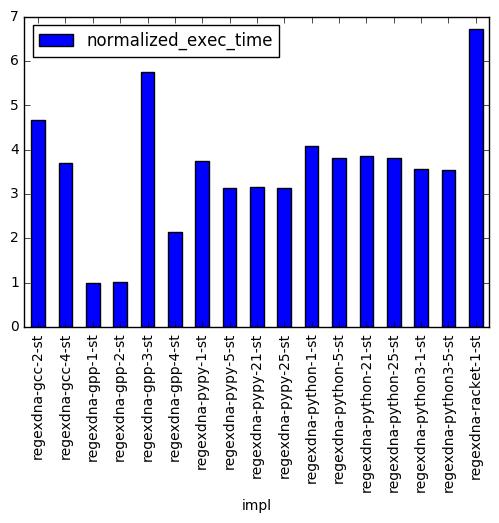

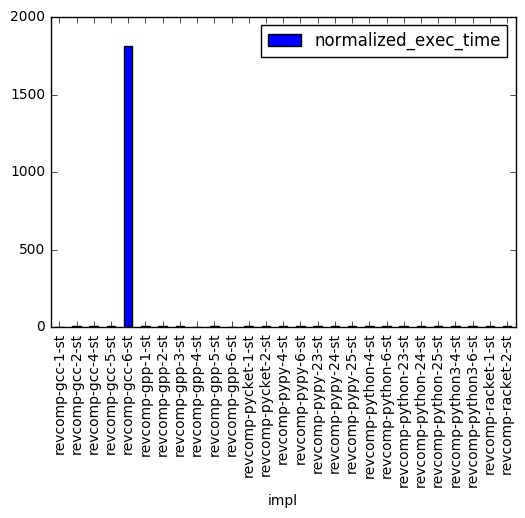

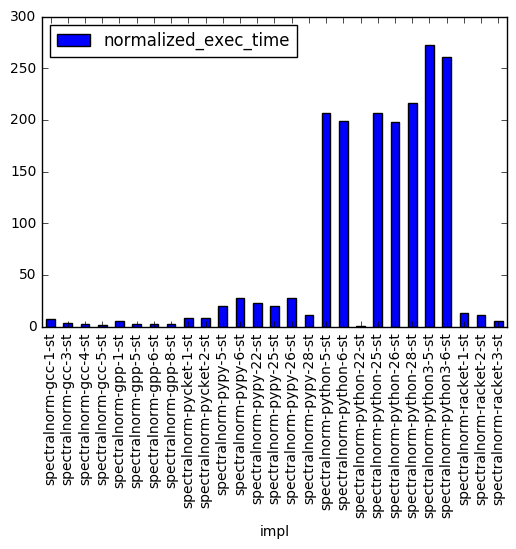

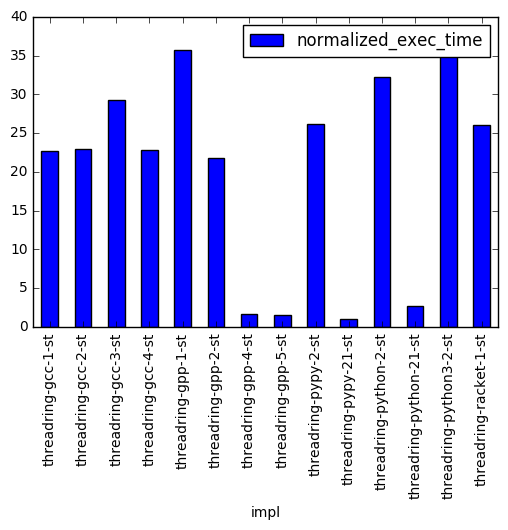

In [42]:
for bmark in bmarks:
    df[(df["name"] == bmark) & (df.type == "st")].plot( kind="bar", x="impl", y="normalized_exec_time" )

## Language comparisons

Benchmarks Game officially doesn't support Python 2. I did my best effort to manually backport Python 3 benchmarks to Python 2 with the help of [`3to2`](https://pypi.python.org/pypi/3to2). Also, the `python`/`pypy` implementations with indexes greater than 20 correspond to implementations from [pybenchmarks](https://github.com/Dundee/pybenchmarks).

To ensure the Python 2 versions are compatible with Python 3, we compare the fastest implementations in each language (all with CPython).

In [44]:
# Create a df with fastest impl first by lang, then bmark.
fast_lang = df.sort_values( by="elapsed(s)" ).groupby( [ "type", "lang", "name" ] ).first()

In [45]:
def plot_compare_langs_fastest( lang1="python", lang2="python3", type_="mt" ):
    ax = (fast_lang.loc[type_].loc[lang1]["elapsed(s)"] 
          / fast_lang.loc[type_].loc[lang2]["elapsed(s)"]).plot( kind="bar" )
    ax.set_ylabel("{} elapsed / {} elapsed ({})".format( lang1, lang2, type_ ) )

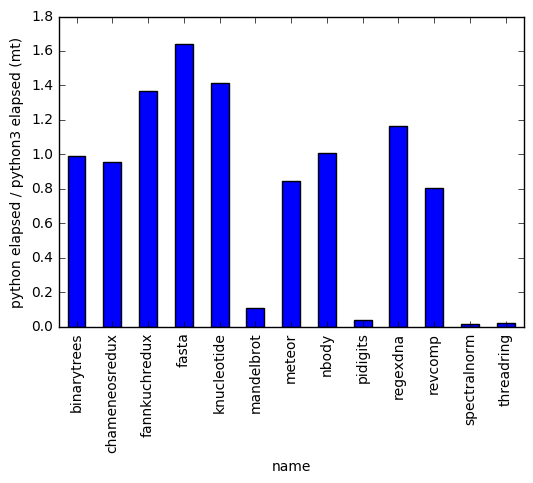

In [46]:
plot_compare_langs_fastest( "python", "python3", "mt" )

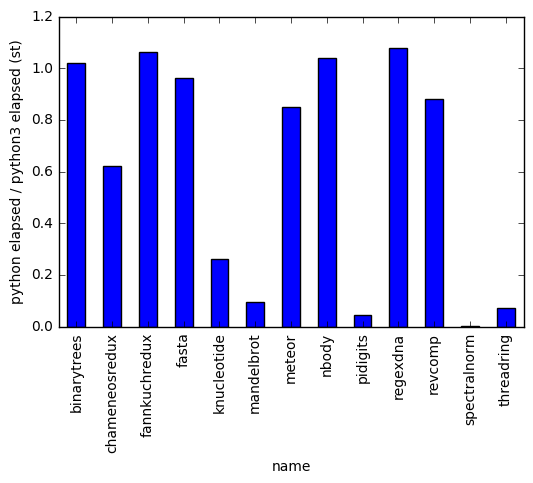

In [47]:
plot_compare_langs_fastest( "python", "python3", "st" )

Compare PyPy with CPython performance for multi-threaded and single-threaded. Further down below, we compare other language pairs.

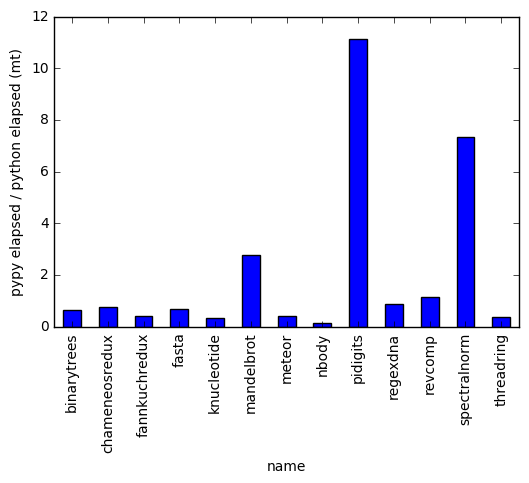

In [48]:
plot_compare_langs_fastest( "pypy", "python", "mt" )

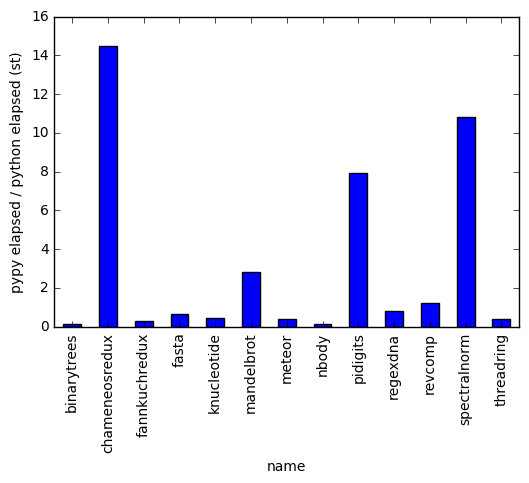

In [49]:
plot_compare_langs_fastest( "pypy", "python", "st" )

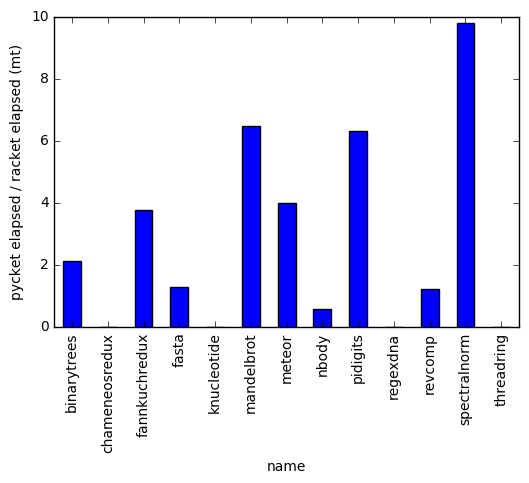

In [50]:
plot_compare_langs_fastest( "pycket", "racket", "mt" )

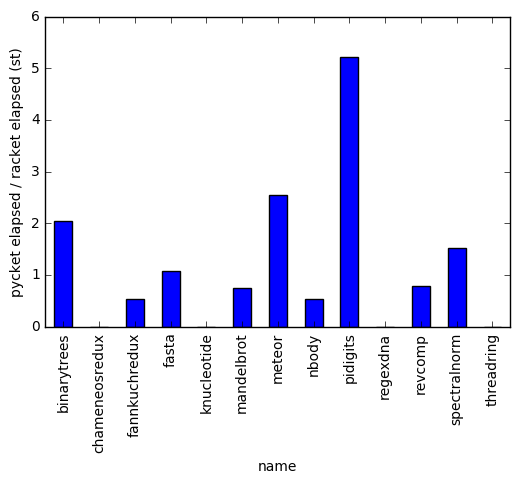

In [51]:
plot_compare_langs_fastest( "pycket", "racket", "st" )

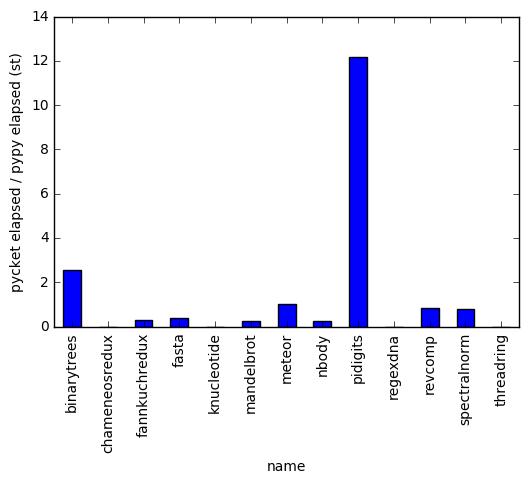

In [52]:
plot_compare_langs_fastest( "pycket", "pypy", "st" )

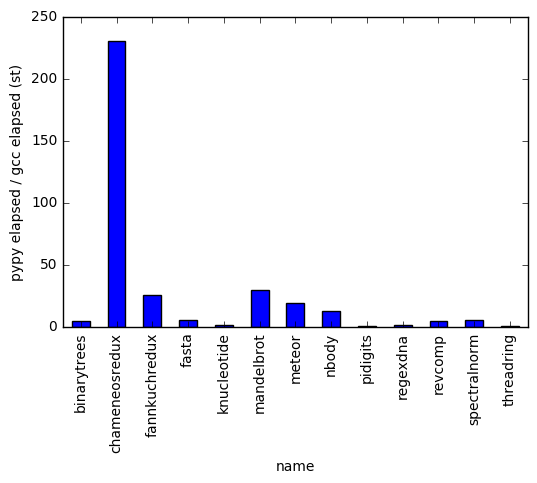

In [53]:
plot_compare_langs_fastest( "pypy", "gcc", "st" )

## Interpreter comparisons

Here, instead of comparing the fastest-performing implementations of each language, we compare the exact implementation on different interpreters. We compare CPython2 vs CPython3, PyPy vs CPython, and Pycket vs Racket on the same pieces of code (except CPython2 vs CPython3 comparison where the source codes are almost the exact same).

In [66]:
def plot_compare_interp( lang1="python", lang2="python3", type_="mt", logy=False, wide=False ):
    # Merge the languages matching name and id.
    comp_df = df[(df.type == type_) & (df.lang == lang1)] \
              .merge( df[ (df.type == type_) & (df.lang == lang2) ], on=["name", "id"] )
    # Generate a new field iterp_comp that divides the elapsed times from merged cols.
    ax = comp_df.assign( interp_comp=comp_df["elapsed(s)_x"] / comp_df["elapsed(s)_y"]) \
                .plot( kind="bar", x=["name","id"], y="interp_comp", 
                       logy=logy, figsize=((8,3) if wide else None))
    ax.set_ylabel("{} elapsed / {} elapsed ({})".format( lang1, lang2, type_ ) )
    

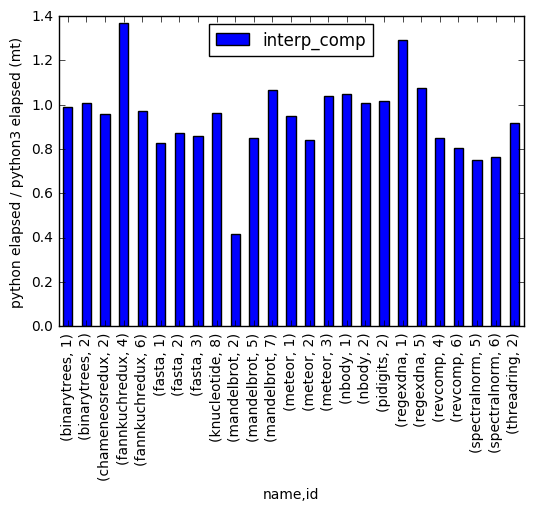

In [67]:
plot_compare_interp( "python", "python3", "mt" )

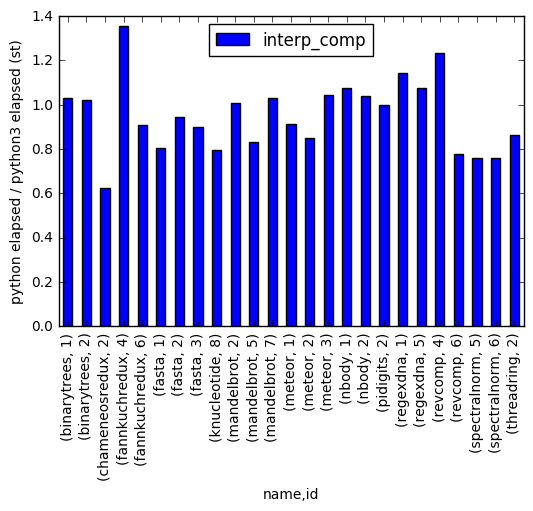

In [64]:
plot_compare_interp( "python", "python3", "st" )

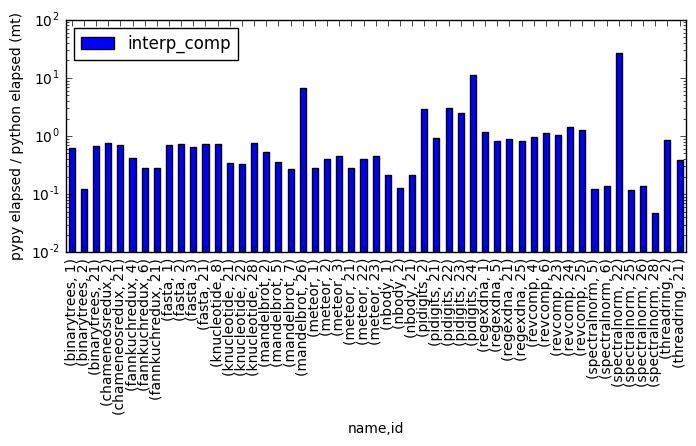

In [68]:
plot_compare_interp( "pypy", "python", "mt", logy=True, wide=True )

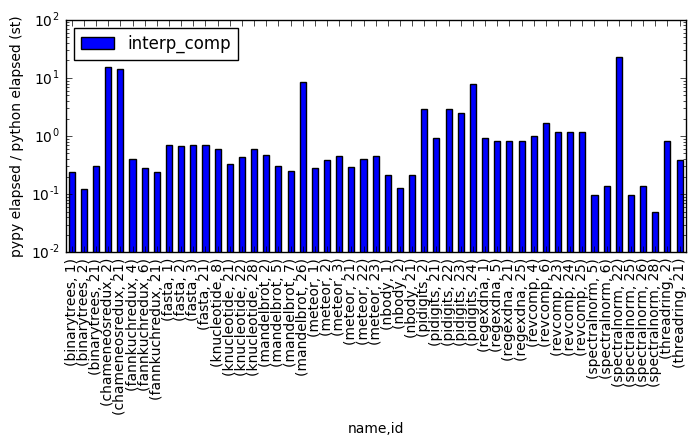

In [69]:
plot_compare_interp( "pypy", "python", "st", logy=True, wide=True )

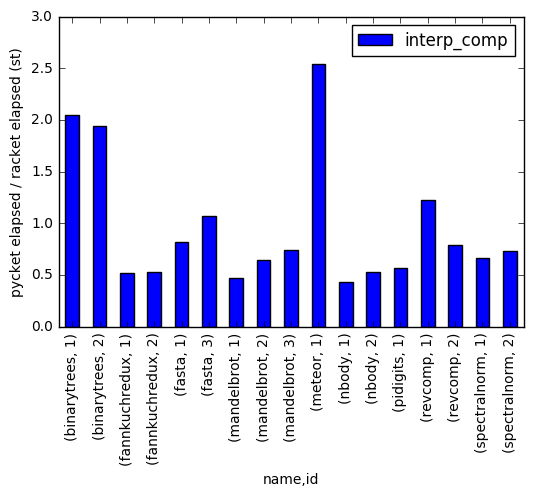

In [70]:
plot_compare_interp( "pycket", "racket", "st" )